<a href="https://colab.research.google.com/github/armandordorica/APS1070_A4_Linear_Regression_Gradient_Descent/blob/master/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4, APS1070 Summer 2020
#### **Linear Regression -  20 points**
**Deadline: Aug 2, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Armando Ordorica
*   Your **student number**: 100 559 2164



## Part 1 - Getting Started [1 mark]

In this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 
![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and the target is to predict the `Goal` column, which is a command that our controller should issue.

In [381]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [382]:
df.describe

<bound method NDFrame.describe of        inputs ClimbRate  Sgz     P     Q  ...  DiffSeTime14  Alpha     Se    Goal
0                   -17   -6 -0.03  0.14  ...           0.0    0.6  0.021 -0.0008
1                  -791   15 -0.28 -0.34  ...           0.0    0.4  0.013 -0.0009
2                   -46   48 -0.42  0.07  ...           0.0    0.5  0.019 -0.0005
3                   496   -5 -0.21 -0.04  ...           0.0    0.5  0.017 -0.0005
4                  -124   16 -0.02  0.05  ...           0.0    0.5  0.018 -0.0006
...                 ...  ...   ...   ...  ...           ...    ...    ...     ...
13745               -53  -13 -0.07  0.02  ...           0.0    0.5  0.019 -0.0007
13746                 1    4 -0.11 -0.07  ...           0.0    0.5  0.016 -0.0004
13747               425  -14  0.40  0.07  ...           0.0    0.9  0.032 -0.0015
13748               102  -10 -0.19  0.08  ...           0.0    1.4  0.051 -0.0015
13749              -165   52  0.08  0.42  ...           0.0    0

1. Split the dataset into training/validation sets (80% training, 20% validation). Note: While splitting use the value of **random state=41**.
2. Standardize the data using StandardScaler from sklearn.

In [383]:
df.columns

Index(['inputs ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll',
       'DiffClb', 'DiffRollRate', 'DiffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'DiffSeTime1', 'DiffSeTime2', 'DiffSeTime3', 'DiffSeTime4',
       'DiffSeTime5', 'DiffSeTime6', 'DiffSeTime7', 'DiffSeTime8',
       'DiffSeTime9', 'DiffSeTime10', 'DiffSeTime11', 'DiffSeTime12',
       'DiffSeTime13', 'DiffSeTime14', 'Alpha', 'Se', 'Goal'],
      dtype='object')

In [384]:
cols = list(df.columns)
X_cols = cols[:-1]

X = df[X_cols]
y = df[cols[-1]]

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)
X_train, X_test, y_train, y_test

(       inputs ClimbRate  Sgz     P  ...  DiffSeTime14  Alpha     Se
 1755                -38  -24 -0.20  ...           0.0    0.5  0.018
 11435                 3   16  0.43  ...           0.0    0.5  0.019
 6528                381   60  0.25  ...           0.0    0.6  0.022
 10868               -68  -23  0.48  ...           0.0    1.0  0.034
 2848                 86  -15  0.03  ...           0.0    1.4  0.049
 ...                 ...  ...   ...  ...           ...    ...    ...
 5200                452  -64  0.48  ...           0.0    0.5  0.017
 4066                -91  -20  0.06  ...           0.0    0.9  0.032
 12172                16   33  0.49  ...           0.0    0.7  0.025
 931                  19  -22 -0.21  ...           0.0    0.7  0.025
 1984                 33  -40 -0.02  ...           0.0    0.6  0.020
 
 [11000 rows x 40 columns],
       inputs ClimbRate  Sgz     P  ...  DiffSeTime14  Alpha     Se
 576                -39  -20 -0.04  ...           0.0    0.5  0.019
 3195 

**Standardizing the data**

In [385]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_cols)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_cols)

y_train_scaled = StandardScaler().fit_transform(np.array(y_train).reshape(-1,1))
y_train_scaled_df = pd.DataFrame(y_train_scaled, index=y_train.index, columns=['Goal'])

y_test_scaled = StandardScaler().fit_transform(np.array(y_test).reshape(-1,1))
y_test_scaled_df = pd.DataFrame(y_test_scaled, index=y_test.index, columns=['Goal'])


In [386]:
# np.array(y_train).reshape(-1,1)

In [387]:
# X_test_scaled_df

## Part 2 - Direct Solution [1 mark]

Implement the direct solution for linear regression on the dataset above (without regularizer).
Report training and validation error.

**Adding vector of 1s and adding it as the zeroth feature**

In [388]:
X_train_scaled_df['b']=1
X_test_scaled_df['b']=1
X_train_scaled_df = X_train_scaled_df[[ 'b','inputs ClimbRate',
 'Sgz',
 'P',
 'Q',
 'CurPitch',
 'CurRoll',
 'AbsRoll',
 'DiffClb',
 'DiffRollRate',
 'DiffDiffClb',
 'SeTime1',
 'SeTime2',
 'SeTime3',
 'SeTime4',
 'SeTime5',
 'SeTime6',
 'SeTime7',
 'SeTime8',
 'SeTime9',
 'SeTime10',
 'SeTime11',
 'SeTime12',
 'SeTime13',
 'SeTime14',
 'DiffSeTime1',
 'DiffSeTime2',
 'DiffSeTime3',
 'DiffSeTime4',
 'DiffSeTime5',
 'DiffSeTime6',
 'DiffSeTime7',
 'DiffSeTime8',
 'DiffSeTime9',
 'DiffSeTime10',
 'DiffSeTime11',
 'DiffSeTime12',
 'DiffSeTime13',
 'DiffSeTime14',
 'Alpha',
 'Se',
]]

X_test_scaled_df = X_test_scaled_df[[ 'b','inputs ClimbRate',
 'Sgz',
 'P',
 'Q',
 'CurPitch',
 'CurRoll',
 'AbsRoll',
 'DiffClb',
 'DiffRollRate',
 'DiffDiffClb',
 'SeTime1',
 'SeTime2',
 'SeTime3',
 'SeTime4',
 'SeTime5',
 'SeTime6',
 'SeTime7',
 'SeTime8',
 'SeTime9',
 'SeTime10',
 'SeTime11',
 'SeTime12',
 'SeTime13',
 'SeTime14',
 'DiffSeTime1',
 'DiffSeTime2',
 'DiffSeTime3',
 'DiffSeTime4',
 'DiffSeTime5',
 'DiffSeTime6',
 'DiffSeTime7',
 'DiffSeTime8',
 'DiffSeTime9',
 'DiffSeTime10',
 'DiffSeTime11',
 'DiffSeTime12',
 'DiffSeTime13',
 'DiffSeTime14',
 'Alpha',
 'Se',
]]

In [389]:
X_train_scaled_np = np.array(X_train_scaled_df)
X_test_scaled_np = np.array(X_test_scaled_df)


y_train_scaled_np = np.array(y_train_scaled_df).reshape(-1,1)
y_test_scaled_np = np.array(y_test_scaled_df).reshape(-1,1)

$$W= (X^TX)^{-1}X^Ty$$

In [390]:
W = np.dot(np.linalg.inv(np.dot(X_train_scaled_np.T, X_train_scaled_np)), np.dot(X_train_scaled_np.T, y_train_scaled_np))
W = W.reshape(-1,1)
W.shape

In [393]:
y_pred_train = np.dot(X_train_scaled_np, W)

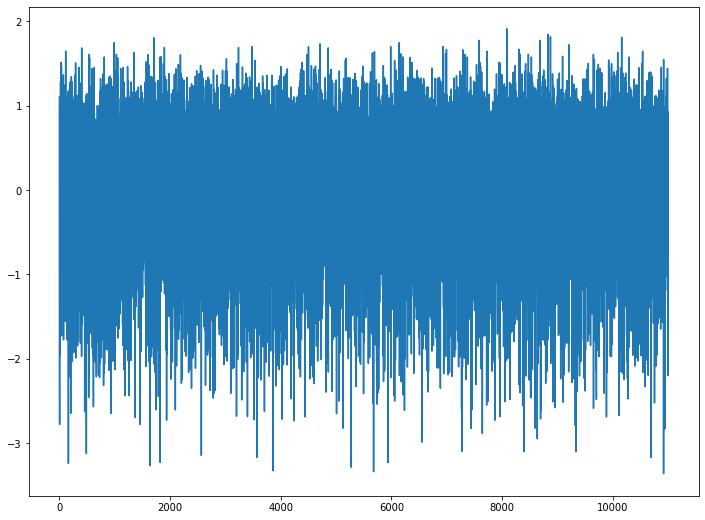

In [394]:
import matplotlib.pyplot as plt

plt.plot(y_pred)

In [395]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))


### **Training error**

In [397]:
print('RMSE: ', rmse(y_pred_train, y_train_scaled_np))

RMSE:  0.4311779987455004


In [398]:
y_pred_train.shape

(11000, 1)

In [399]:
y_train_scaled_np.shape

(11000, 1)

**Comparing segments of `y_pred` and `y_train original`**

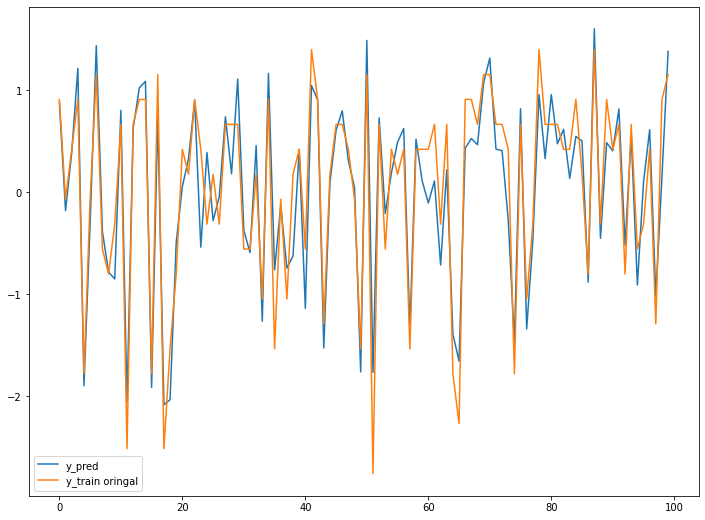

In [400]:
plt.plot(y_pred_train[2100:2200], label='y_pred')
plt.plot(y_train_scaled_np[2100:2200], label='y_train oringal')
plt.legend()

### **Valudation error**

In [401]:
y_pred_test = np.dot(X_test_scaled_np, W)


In [402]:
print('RMSE: ', rmse(y_pred_test, y_test_scaled_np))

RMSE:  0.4391875247400215


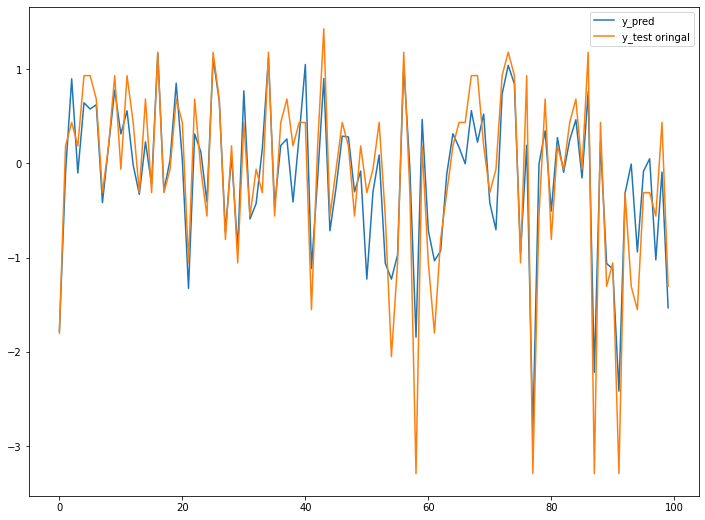

In [404]:
plt.plot(y_pred_test[2100:2200], label='y_pred')
plt.plot(y_test_scaled_np[2100:2200], label='y_test oringal')
plt.legend()

## Part 3 - Gradient Descent (GD) [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate of $\alpha= 1e-2$. You should compute the gradients yourself! First try to implement it without looking at other resources, but if you need a hint take a look [here](https://towardsdatascience.com/gradient-descent-explanation-implementation-c74005ff7dd1) and [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results are closely approximate the direct solution.

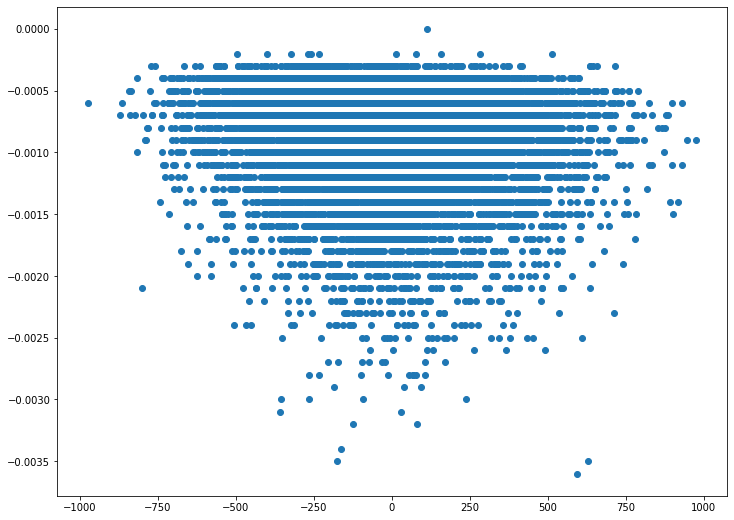

In [175]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
X = df.iloc[:, 0]
Y = df.iloc[:, -1]
plt.scatter(X, Y)
plt.show()

In [176]:
W.shape

(41, 1)

In [177]:
X_train_scaled_df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
1755,-0.106108,-0.437204,-0.675831,0.167087,-0.280852,-0.061699,1.216466,0.175012,0.070773,-0.578864,-0.564695,-0.563666,-0.563671,-0.564511,-0.564553,-0.565229,-0.565225,-0.566928,-0.566931,-0.568760,-0.568739,-0.569456,-0.569470,-0.570360,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,-0.625400,-0.570336
11435,0.051777,1.117312,1.394136,0.420146,-0.280852,0.351065,-0.473588,-0.493602,-0.004994,-0.131167,-0.418978,-0.418588,-0.418589,-0.419613,-0.419637,-0.420541,-0.420555,-0.422447,-0.422447,-0.424538,-0.424529,-0.425604,-0.425631,-0.426630,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,-0.625400,-0.426619
6528,1.507398,2.827279,0.802717,1.601083,-1.241031,0.247874,0.733593,-1.544280,-0.156527,-0.489324,0.018175,0.016644,0.016658,0.015083,0.015111,0.013522,0.013454,0.010994,0.011007,0.008129,0.008102,0.005950,0.005884,0.004560,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,-0.116757,0.004534
10868,-0.221634,-0.398341,1.558419,-0.929498,1.447469,0.144683,0.250721,0.175012,0.373840,0.316530,1.766785,1.757575,1.757645,1.753865,1.754103,1.749774,1.749492,1.744757,1.744822,1.738795,1.738624,1.732168,1.731947,1.729319,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,1.917815,1.729143
2848,0.371397,-0.087438,0.079871,2.022847,1.927559,-0.990418,-2.405079,-0.302569,-0.383828,-0.131167,3.952548,3.933739,3.933878,3.927342,3.927843,3.920089,3.919538,3.911962,3.912090,3.902128,3.901777,3.889941,3.889526,3.885268,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,3.952387,3.884906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,1.780809,-1.991720,1.558419,-0.929498,-1.721120,-1.093609,0.492157,0.366044,0.449607,1.032844,-0.710413,-0.708744,-0.708753,-0.709410,-0.709469,-0.709917,-0.709895,-0.711408,-0.711416,-0.712982,-0.712949,-0.713307,-0.713309,-0.714089,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,-0.625400,-0.714054
4066,-0.310203,-0.281752,0.178441,-0.676440,1.287440,-1.815946,-0.956461,1.034658,1.889176,-0.131167,1.475350,1.467420,1.467480,1.464068,1.464271,1.460398,1.460152,1.455797,1.455853,1.450351,1.450204,1.444465,1.444270,1.441859,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,1.409172,1.441708
12172,0.101838,1.777981,1.591276,1.854142,0.103219,0.351065,-2.405079,-0.589118,-0.762662,-0.578864,0.455328,0.451877,0.451905,0.449778,0.449859,0.447585,0.447464,0.444435,0.444461,0.440795,0.440733,0.437505,0.437400,0.435750,0.186342,0.0,0.123067,0.00603,0.145505,0.017165,0.156442,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,0.391886,0.435686
931,0.113390,-0.359478,-0.708687,-0.507734,0.199237,0.351065,0.733593,0.366044,-0.459595,-0.399785,0.601045,0.596955,0.596987,0.594677,0.594775,0.592272,0.592133,0.444435,0.444461,0.440795,0.440733,0.437505,0.437400,0.435750,0.186342,0.0,-2.049859,0.00603,-1.954965,0.017165,1.943428,0.0,0.167841,0.006848,0.155642,0.014714,0.150387,0.014303,0.391886,0.435686


In [185]:
X_train_scaled_np = np.array(X_train_scaled_df)
y_train_scaled_np = np.array(y_train_scaled_df)

,Goal
1755,1.151662
11435,-0.314885
6528,0.418388
10868,-0.803735
2848,-3.247980
...,...
5200,0.173964
4066,-1.048159
12172,-2.270282
931,0.662813


In [187]:
def h_theta(x): 
  return np.dot(W.T, x)

In [188]:
h_theta(X_train_scaled_np[0] - y_train_scaled_np[0])

ValueError: ignored

In [183]:
X_train_scaled_df.iloc[0]

inputs ClimbRate   -0.106108
Sgz                -0.437204
P                  -0.675831
Q                   0.167087
CurPitch           -0.280852
CurRoll            -0.061699
AbsRoll             1.216466
DiffClb             0.175012
DiffRollRate        0.070773
DiffDiffClb        -0.578864
SeTime1            -0.564695
SeTime2            -0.563666
SeTime3            -0.563671
SeTime4            -0.564511
SeTime5            -0.564553
SeTime6            -0.565229
SeTime7            -0.565225
SeTime8            -0.566928
SeTime9            -0.566931
SeTime10           -0.568760
SeTime11           -0.568739
SeTime12           -0.569456
SeTime13           -0.569470
SeTime14           -0.570360
DiffSeTime1         0.186342
DiffSeTime2         0.000000
DiffSeTime3         0.123067
DiffSeTime4         0.006030
DiffSeTime5         0.145505
DiffSeTime6         0.017165
DiffSeTime7         0.156442
DiffSeTime8         0.000000
DiffSeTime9         0.167841
DiffSeTime10        0.006848
DiffSeTime11  

## Part 4 - Mini-batch and Stochastic Gradient Descent [3 marks]

When B=1, we call that stochastic gradient descent.  When B=#train data points, it is full-batch (ie all data points are used, every cycle). Anywhere in between is mini-batch (we use some of the data).  

1. Implement Mini-batch Gradient Descent. 
First try to implement it without looking at other resources, but if you need a hint take a look [here](https://towardsdatascience.com/gradient-descent-explanation-implementation-c74005ff7dd1) and [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

2. Sweep different values for the mini-batch size (including 1 -- Stochastic GD) with a fixed learning rate and report your findings on a plot (training error and validation error vs. iterations).

## Part 5 - Learning Rate [2 marks]
Select the best batch size based on fastest convergence (number of times you update the weights) and sweep the learning rate while applying Mini-batch GD. Report your findings on a plot.


## Part 6 - Regularizers [4 marks]



1.   Formula (use a text cell --markdown-- and write in latex): 
  *   Derive the Direct solution formula when a L1 regularizer ($\lambda_1$) is employed.
  *   Derive the Direct solution formula when a L2 regularizer ($\lambda_2$) is employed.
  *   Derive the Gradient Descent weight update formula when the L1 regularizer is employed.
  *   Derive the Gradient Descent weight update formula when the L2 regularizer is employed.



2.   Evaluation:

  *  Apply L1 and L2 regularizers (separately) to the direct solution and plot train and validation error as a function of the $\lambda$. Find the best regularizer ($\lambda$) values to use in the next steps.

    *   Plot mini-batch GD train error and validation error when $\lambda_1$ regularizer is employed. (X-axis: iterations)

    *   Plot mini-batch GD train error and validation error when $\lambda_2$ regularizer is employed. (X-axis: iterations)



* Summarize your findings and explain whether L1 or L2 regularizers are helping the GD convergence. Is it always safe to use a L1 regularizer? How about L2?



## Part 7 - Introducing Momentum [4 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. $\beta$ is the momentum coefficient, between [0, 1]. Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

Train a linear model with a regularizer and various values of momentums. Plot your training and validation error for each iteration. Comment on the effect of momentum.

## Part 8 - Find a dataset online [3 marks]


Find a dataset online and train a linear model with the techniques you learned to make a prediction. 

*   Introduce your dataset,
*   How did you train your model,
*   Show your results.

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.




